# Long Short Term Memory (Recurrent Neural Network)
### Making predictions in a time series
#### Based on https://machinelearningmastery.com/multi-step-time-series-forecasting-long-short-term-memory-networks-python/

### 1) Load Data

In [2]:
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
import numpy as np
import pdb

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series_values = series.values
# summarize first few rows
print(series.head())

plt.plot(series_values)

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales of shampoo over a three year period, dtype: float64


### 2) Prepare the data for LSTM

It needs to be stationary (meaning we remove the long-term upward trend). It also needs to have values between -1 and 1.


[-120.1   37.2  -63.8   61.   -11.8   63.3   -7.3  -31.7  -69.9  213.6
 -150.6    8.4  -44.8   60.6   63.2  -81.9   95.6  -61.    77.6  -13.7
  131.7 -157.1   77.8   -2.6  100.7 -124.5  123.4  -38.    36.1  138.1
 -167.9  274.4 -206.7  106.    65.6]


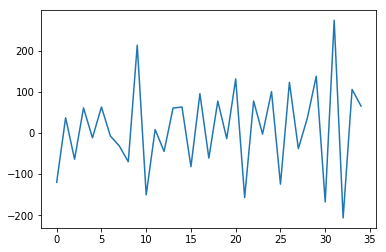

In [19]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)-1):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.asarray(diff)

diff_series = difference(series_values, 1)
print(diff_series)
diff_values = diff_series.reshape(len(diff_series), 1)
plt.plot(diff_values)

#### Now the data is stationary so we need to make it between -1 and 1

(35,)


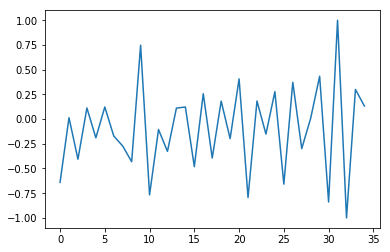

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_values = scaler.fit_transform(diff_values)
scaled_values = scaled_values.reshape(len(scaled_values),)
plt.plot(scaled_values)
print(scaled_values.shape)

### 3) Train/test split and building dataset

We will use the first two years (data points 1-24) as training and the last year (data points 25-36) as testing. We need to make a three month forecast for every month in the dataset. To do this, we will make the data into an nx4 matrix for supervised learning.

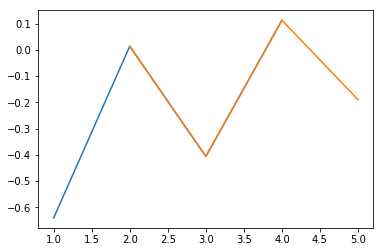

In [27]:
look_ahead = 3

train_test = np.zeros((scaled_values.shape[0]-look_ahead-1,1+look_ahead))
train = np.zeros((23,1+look_ahead))
test = np.zeros((10,1+look_ahead))

def series_to_supervised(raw, forecast):
    for i in range(0,raw.shape[0]-forecast-1):
        train_test[i,0:forecast+1] = raw[i:i+forecast+1]
    return train_test

train_test = series_to_supervised(scaled_values, forecast=look_ahead)
train = train_test[0:23,:]
test = train_test[23:33,:]